# Standardization and Normalization of data

In this notebook we will be discussing feature scaling and how it can positively impact your model building experience (for some models!).

## What is Standardization?
 
Standardization is a scaling technique where you center the values of your dataset's features around the mean with a unit standard deviation.  This helps put all features within a dataset on a comparable scale, taking care of skewness and scale issues, which helps models to process the information.  The process involves turning each feature  into a normal distribution (See graph below).  A normal distribution has a mean of 0 with a standard deviation of 1. When the features are standardized the standard deviation of each feature reflects the standard deviation found in the features original values. It can help to think of standardization by imagining each feature as having its own normal distribution graph.  

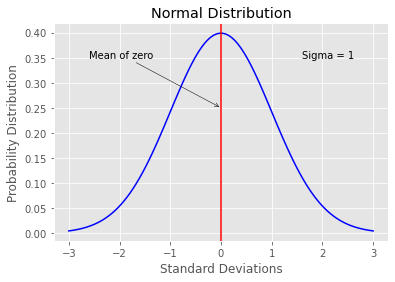

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
%matplotlib inline

plt.style.use('ggplot')
mean=0
std=1
x=np.linspace(mean-3*std, mean+3*std,100)
iq=stats.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

px=np.arange(-3,-1.96,.1)
px1=np.arange(1.96,3,.1)
plt.xlabel('Standard Deviations')
plt.ylabel('Probability Distribution')
plt.title('Normal Distribution')
plt.axvline(x = 0, color = 'red')

plt.annotate('Mean of zero', xy=(0, 0.25),xytext=(-2.6, 0.35), arrowprops = {"arrowstyle":"->", "color":"black"})
plt.annotate('Sigma = 1',xy=(0, 0.25), xytext=(1.6, 0.35))

plt.show()

### Standard deviation formula:

### $z = \frac{x-\mu}{\sigma}$

$\mu$ = Mean of the given distribution

$\sigma$ = Standard deviation of the given distribution

$z$ = Standard score.  Represents the number of standard deviations above/below the mean for a specific observation

<br>
<br>

### When should you standardize your data?

Standardizing our dataset's features to have a mean of 0 and a standard deviation of 1 is appropriate when we know our feature's have a gaussian distribution (normal distribution) and the scales between each variable are widely differing. trying to compare measurements that have different units.  In our dataset below we have two variables, # of kids and weight.  When we look at the values within each variable we can see that they are obviously in very different units, and have wildly different scales.  Standardization brings them to a comparable level that allows for meaningful inference on each's impact during our model building phase.  Standardization can be helpful when you are using machine learning models that make assumptions about your data's distribution, such as logistic/linear regression or LDA.

Let's run through a practice example of standarization to demonstrate how it transforms the feature's distribution.

<br>

**Note the difference in x-scale's between kids and weight.  A machine learning model may overstate the signal found in weight just because the scale is much larger than that of kids.  By standardizing them both, we put them on equal footing in terms of each values standard deviation about the feature's mean value, allowing for an apples to apples comparison of feature values.


''

'First 10 observations:'

,kids,weight
0,4,146
1,2,150
2,0,151
3,1,154
4,6,155
5,0,158
6,1,160
7,0,161
8,2,163
9,0,169


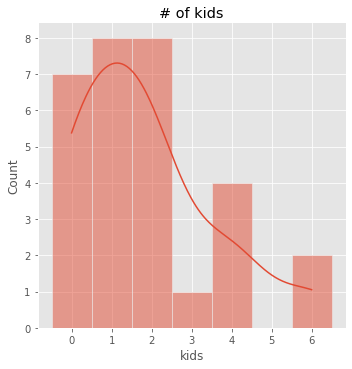

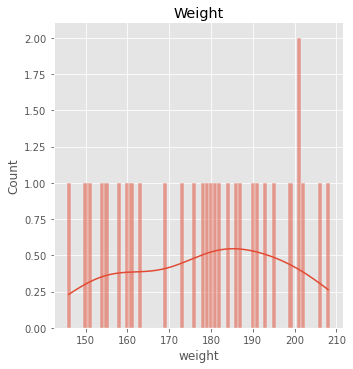

'============================================='

'Kids maximum value: 6'

'Kids minimum value: 0'

'============================================='

'Weight maximum value: 208'

'Weight minimum value: 146'

,Transformed kids,Transformed weight
0,0.666667,0.000000
1,0.333333,0.064516
2,0.000000,0.080645
3,0.166667,0.129032
4,1.000000,0.145161
5,0.000000,0.193548
6,0.166667,0.225806
7,0.000000,0.241935
8,0.333333,0.274194
9,0.000000,0.370968


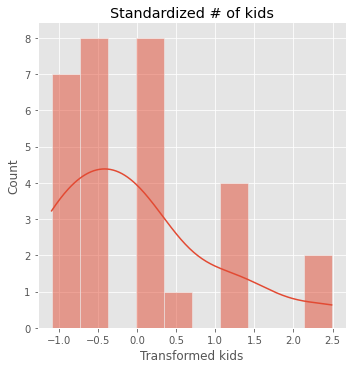

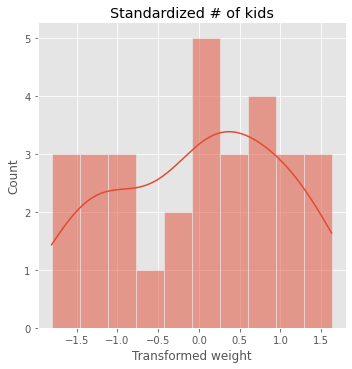

'============================================='

'Transformed kids maximum value: 2.487592975524973'

'Transformed kids minimum value: -1.0945409092309881'

'============================================='

'Transformed weight maximum value: 1.6268879352440473'

'Transformed weight minimum value: -1.8078584433642697'

In [20]:
import sys
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

weight = [146,150,151,154,155,158,160,161,163,169,173,176,178,179,180,181,182,184,186,187,190,191,193,195,199,201,202,206,208,201]

kids = [4,2,0,1,6,0,1,0,2,0,2,1,2,0,1,0,1,6,2,0,4,1,3,4,2,1,2,4,2,1]

df = pd.DataFrame({'kids' : kids, 'weight' : weight})

# Display the first 10 observations of our dataframe
display('')
display("First 10 observations:")
display(df.head(10))

# Plot the untransformed data
sns.displot(df['kids'], kde=True, bins = 10, discrete = True).set(title= '# of kids')

sns.displot(df['weight'], kde=True, bins = 10, discrete = True).set(title= 'Weight')

plt.show()
display('=============================================')

display('Kids maximum value: ' + str(df['kids'].max()))
display('Kids minimum value: ' + str(df['kids'].min()))

display('=============================================')


display('Weight maximum value: ' + str(df['weight'].max()))
display('Weight minimum value: ' + str(df['weight'].min()))


plt.show()



# Here we will standardize our data using Standard Scalar from the sklearn library

cols = df.columns
sc = StandardScaler()
df_standardized = pd.DataFrame(sc.fit_transform(df), columns=['Transformed kids', 'Transformed weight'])

display(kids_standardized)

sns.displot(df_standardized['Transformed kids'],  kde=True, bins = 10).set(title = 'Standardized # of kids')
sns.displot(df_standardized['Transformed weight'],  kde=True, bins = 10).set(title = 'Standardized # of kids')
plt.show()

display('=============================================')

display('Transformed kids maximum value: ' + str(df_standardized['Transformed kids'].max()))
display('Transformed kids minimum value: ' + str(df_standardized['Transformed kids'].min()))

display('=============================================')

display('Transformed weight maximum value: ' + str(df_standardized['Transformed weight'].max()))
display('Transformed weight minimum value: ' + str(df_standardized['Transformed weight'].min()))


## What is Normalization?

Normalization is another data scaling technique that looks to put features in like terms for easier comparison.  It does so by condensing all of a features observations on a scale of 0 to 1, where 0 represents the minimum value, and 1 represents the maximum feature value.

### When should you normalize your data?

You should normalize your data when you do not know the distribution of your data or when you know the distribution is not gaussian (normal distribution).  Normalizing is useful when your data is on varying scales and/or you are using a machine learning technique that does not make assumptions about your data's distribution (ie. KNN or Neural Networks)


''

'First 10 observations:'

,kids,weight
0,4,146
1,2,150
2,0,151
3,1,154
4,6,155
5,0,158
6,1,160
7,0,161
8,2,163
9,0,169


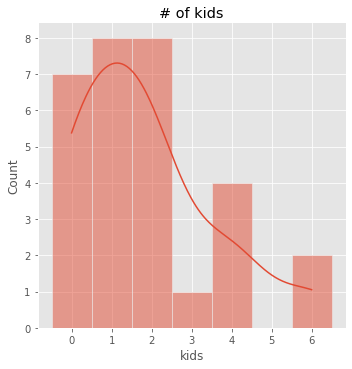

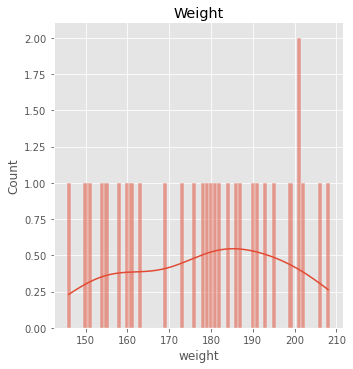

'============================================='

'Kids maximum value: 6'

'Kids minimum value: 0'

'============================================='

'Weight maximum value: 208'

'Weight minimum value: 146'

,Transformed kids,Transformed weight
0,0.666667,0.000000
1,0.333333,0.064516
2,0.000000,0.080645
3,0.166667,0.129032
4,1.000000,0.145161
5,0.000000,0.193548
6,0.166667,0.225806
7,0.000000,0.241935
8,0.333333,0.274194
9,0.000000,0.370968


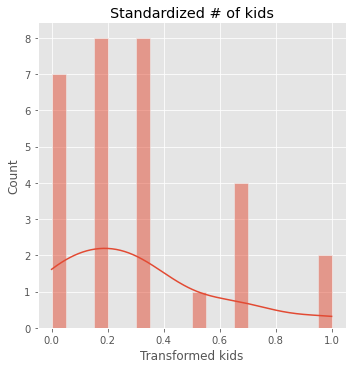

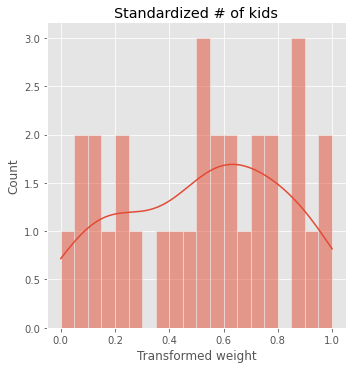

'============================================='

'Transformed kids maximum value: 1.0'

'Transformed kids minimum value: 0.0'

'============================================='

'Transformed weight maximum value: 0.9999999999999996'

'Transformed weight minimum value: 0.0'

In [23]:
import sys
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

weight = [146,150,151,154,155,158,160,161,163,169,173,176,178,179,180,181,182,184,186,187,190,191,193,195,199,201,202,206,208,201]

kids = [4,2,0,1,6,0,1,0,2,0,2,1,2,0,1,0,1,6,2,0,4,1,3,4,2,1,2,4,2,1]

df = pd.DataFrame({'kids' : kids, 'weight' : weight})

# Display the first 10 observations of our dataframe
display('')
display("First 10 observations:")
display(df.head(10))

# Plot the untransformed data
sns.displot(df['kids'], kde=True, bins = 20, discrete = True).set(title= '# of kids')

sns.displot(df['weight'], kde=True, bins = 20, discrete = True).set(title= 'Weight')

plt.show()
display('=============================================')

display('Kids maximum value: ' + str(df['kids'].max()))
display('Kids minimum value: ' + str(df['kids'].min()))

display('=============================================')


display('Weight maximum value: ' + str(df['weight'].max()))
display('Weight minimum value: ' + str(df['weight'].min()))


plt.show()



# Here we will standardize our data using Standard Scalar from the sklearn library

cols = df.columns
sc = MinMaxScaler()
df_standardized = pd.DataFrame(sc.fit_transform(df), columns=['Transformed kids', 'Transformed weight'])

display(kids_standardized)

sns.displot(df_standardized['Transformed kids'],  kde=True, bins = 20).set(title = 'Standardized # of kids')
sns.displot(df_standardized['Transformed weight'],  kde=True, bins = 20).set(title = 'Standardized # of kids')
plt.show()

display('=============================================')

display('Transformed kids maximum value: ' + str(df_standardized['Transformed kids'].max()))
display('Transformed kids minimum value: ' + str(df_standardized['Transformed kids'].min()))

display('=============================================')

display('Transformed weight maximum value: ' + str(df_standardized['Transformed weight'].max()))
display('Transformed weight minimum value: ' + str(df_standardized['Transformed weight'].min()))
